## Trapping Rain Water
#### Difficulty: Hard

You are given an array of non-negative integers height which represent an elevation map. Each value height[i] represents the height of a bar, which has a width of 1.

Return the maximum area of water that can be trapped between the bars.

Constraints:
- 1 <= height.length <= 1000
- 0 <= height[i] <= 1000

Link to problem: https://leetcode.com/problems/trapping-rain-water/description/

In [ ]:
# Solution 1: Works as intended. Runs with O(n) Time & Space complexity.
# Although this solution works, runtime and memory are not optimized.
# This is likely to do with some inefficient array management (Specifically l_max & r_max. Constant appends and a reverse() for r_max. Likely the culprit)
class Solution:
    def trap(self, height: List[int]) -> int:
        # Error Catch
        if len(height) < 3:
            return 0
        
        # Init max_arrays & output:
        l_max, r_max, output = [0], [0], 0
        

        # Find l_max and r_max for each number in the array
        curr_max = 0
        for i in range(0, len(height)-1):
            if height[i] > curr_max:
                curr_max = height[i]
            l_max.append(curr_max)
        # print("L_Max array: ", l_max)

        # Requires reverse in order to match 
        curr_max = 0
        for i in range(len(height)-1,0,-1):
            if height[i] > curr_max:
                curr_max = height[i]
            r_max.append(curr_max)
        r_max.reverse()
        # print("R_Max array: ", r_max)


        for i in range(0,len(height)-1):
            # Take min of l_max and r_max to determine height
            # Total added area = Height of min(l_max,r_max) - height[i] (if negative; round to 0 (no added area))
            value = min(l_max[i],r_max[i]) - height[i]
            
            # Update output (if greater than 0) & continue loop 
            if value > 0:
                output += value

        return output

Results:

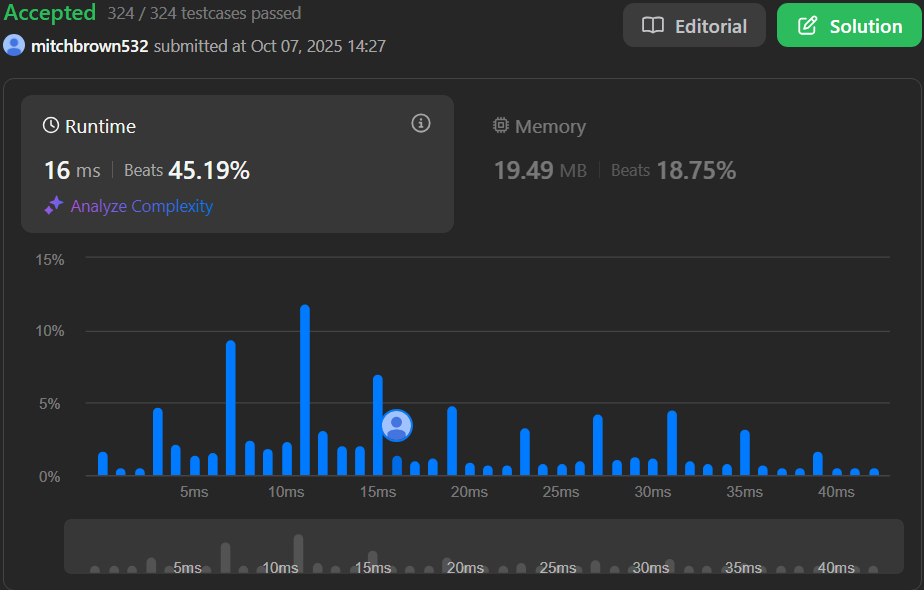

In [ ]:
# Solution 2: Followed the exact same logic, but optimized the array management
# Results in a very marginal improvement on Runtime & space (3ms, 0.04mb)
# Still not fully optimized. Solution 3 will resolve this.
class Solution:
    def trap(self, height: List[int]) -> int:
        # Store Length to avoid repeated calls of len() & improve readability (and less typing)
        n = len(height)

        # Error Catch
        if n < 3:
            return 0
        
        # Init max_arrays & output:
        # NOTE: by creating arrays with proper length, I can avoid append, insert, and reverse (Each run in O(n) and use space unnecessarily)
        l_max, r_max, output = [0]*n, [0]*n, 0
        

        # Find l_max and r_max for each number in the array
        curr_max = 0
        for i in range(n):
            if height[i] > curr_max:
                curr_max = height[i]
            l_max[i] = curr_max
        # print("L_Max array: ", l_max)

        # No reverse necessary b/c of better array management
        curr_max = 0
        for i in range(n-1,-1,-1):
            if height[i] > curr_max:
                curr_max = height[i]
            r_max[i] = curr_max
        # print("R_Max array: ", r_max)


        for i in range(0,len(height)-1):
            # Take min of l_max and r_max to determine height
            # Total added area = Height of min(l_max,r_max) - height[i] (if negative; round to 0 (no added area))
            value = min(l_max[i],r_max[i]) - height[i]
            
            # Update output (if greater than 0) & continue loop 
            if value > 0:
                output += value

        return output

Results:

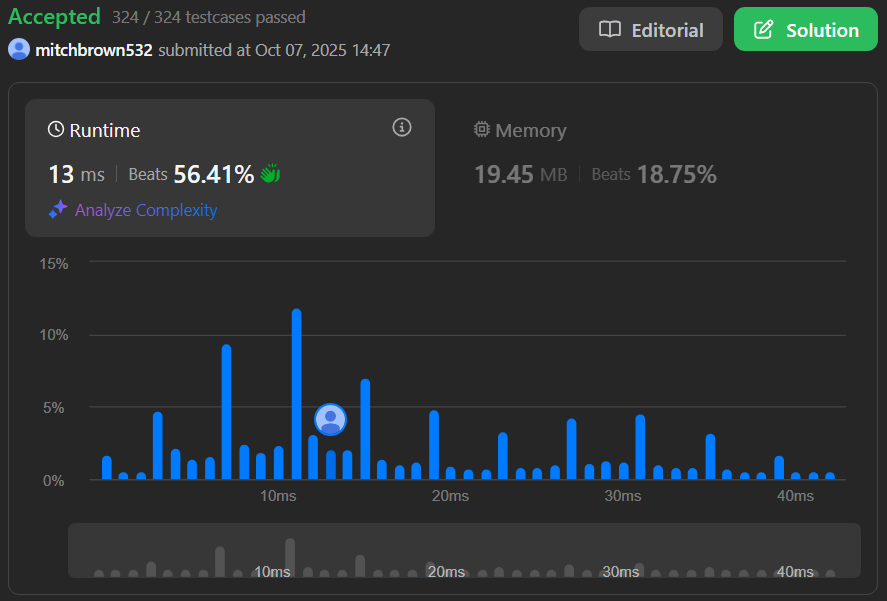

In [ ]:
# Solution 3: Inspired from existing solution on Leetcode, logic is very similar to that I've used in solution 1 & 2
# Performs much better than previous solutions (6ms & 0.2MB improvement from solution 1)
# Does not create arrays for l_max and r_max - just keeps track of running maxes
# Avoiding the extra arrays and evaluations associated with them saves us lots of time and memory.

class Solution:
    def trap(self, height: List[int]) -> int:
        # Init all the stuff (pointers, maxes, output)
        l, r = 0, len(height) - 1
        l_max, r_max = 0, 0
        output = 0

        # At each step, move the side with the smaller current height. 
        # Make sure to track running maxes for both ends (max_l & max_r)
        while l <= r:
            # Left side <= right, therefore compare height[l] to the l_max.
            # If less than max, update the output. (Water is being stored on this entry)
            # Else, update JUST the max (No water stored)
            if height[l] <= height[r]:
                if height[l] >= l_max:
                    l_max = height[l]
                else:
                    output += l_max - height[l]
                l += 1

            # Right side > left, therefore do same as above (except for the right side).
            else:
                if height[r] >= r_max:
                    r_max = height[r]
                else:
                    output += r_max - height[r]
                r -= 1

        return output

Results:

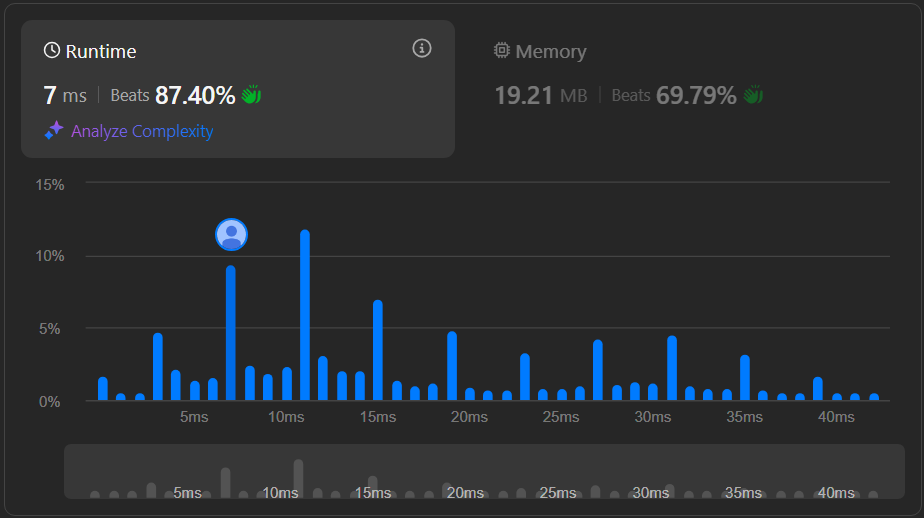